In [1]:
import pandas as pd
import numpy as np



In [2]:
bollywood = pd.read_csv("E:\\jupyter notebook files\\bollywood.csv", index_col= 'movie',squeeze=True)

C:\Users\rouna\AppData\Local\Temp\ipykernel_4696\3908242752.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  bollywood = pd.read_csv("E:\\jupyter notebook files\\bollywood.csv", index_col= 'movie',squeeze=True)


In [3]:
bollywood

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [4]:
vk = pd.read_csv("E:\jupyter notebook files\kohli_ipl.csv",index_col='match_no', squeeze=True)

C:\Users\rouna\AppData\Local\Temp\ipykernel_4696\4263979590.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  vk = pd.read_csv("E:\jupyter notebook files\kohli_ipl.csv",index_col='match_no', squeeze=True)


In [5]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [17]:
#astype -> reduce memory footprint by changing datatype

import sys

sys.getsizeof(vk)

3456

In [20]:
sys.getsizeof(vk.astype('int16'))

2166

In [25]:
#between
# In how many matched VK scored between 51 and 99

vk[vk.between(51,99)].count()

43

In [26]:
#drop_dulicates

temp = pd.Series([1,1,2,2,3,4,4,5,6,8])
temp


0    1
1    1
2    2
3    2
4    3
5    4
6    4
7    5
8    6
9    8
dtype: int64

In [27]:
temp.drop_duplicates()

0    1
2    2
4    3
5    4
7    5
8    6
9    8
dtype: int64

In [29]:
# how many duplicates in the temp series

temp.duplicated().sum()

3

In [33]:
#isnull

temp = pd.Series([1,2,3,4,np.NaN,6,np.NaN,8,9,np.NaN])
temp

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    NaN
7    8.0
8    9.0
9    NaN
dtype: float64

In [35]:
temp.size # size also counts null values

10

In [36]:
temp.count() #count() doesnot count null values

7

In [38]:
temp.isnull().sum()

3

In [40]:
vk.isnull().sum()

0

In [41]:
#dropna -> drops NaN values

temp.dropna()

0    1.0
1    2.0
2    3.0
3    4.0
5    6.0
7    8.0
8    9.0
dtype: float64

In [42]:
#fillna -> fills NaN values with custom values

temp.fillna(100)

0      1.0
1      2.0
2      3.0
3      4.0
4    100.0
5      6.0
6    100.0
7      8.0
8      9.0
9    100.0
dtype: float64

In [43]:
#replace NaN values with mean values

temp.fillna(temp.mean())

0    1.000000
1    2.000000
2    3.000000
3    4.000000
4    4.714286
5    6.000000
6    4.714286
7    8.000000
8    9.000000
9    4.714286
dtype: float64

In [45]:
#isin
# is VK got out in 49 or 99 runs

vk[vk.isin([49,99])]

match_no
82    99
86    49
Name: runs, dtype: int64

In [46]:
#apply -> allows you to apply your own custom logic/function into a series

#in bollywood, only shows the first name of actors and in uppercase

bollywood.apply(lambda x: x.split())

movie
Uri: The Surgical Strike                   [Vicky, Kaushal]
Battalion 609                                [Vicky, Ahuja]
The Accidental Prime Minister (film)         [Anupam, Kher]
Why Cheat India                            [Emraan, Hashmi]
Evening Shadows                         [Mona, Ambegaonkar]
                                               ...         
Hum Tumhare Hain Sanam                   [Shah, Rukh, Khan]
Aankhen (2002 film)                     [Amitabh, Bachchan]
Saathiya (film)                             [Vivek, Oberoi]
Company (film)                                [Ajay, Devgn]
Awara Paagal Deewana                        [Akshay, Kumar]
Name: lead, Length: 1500, dtype: object

In [47]:
bollywood.apply(lambda x: x.split()[0])

movie
Uri: The Surgical Strike                  Vicky
Battalion 609                             Vicky
The Accidental Prime Minister (film)     Anupam
Why Cheat India                          Emraan
Evening Shadows                            Mona
                                         ...   
Hum Tumhare Hain Sanam                     Shah
Aankhen (2002 film)                     Amitabh
Saathiya (film)                           Vivek
Company (film)                             Ajay
Awara Paagal Deewana                     Akshay
Name: lead, Length: 1500, dtype: object

In [48]:
bollywood.apply(lambda x: x.split()[0].upper())

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object

In [ ]:
# in VK dataset, if vk scored more than average then called it good match otherwise bad match

In [49]:
vk.mean()

30.855813953488372

In [50]:
vk.apply(lambda x: 'good match' if x > vk.mean() else 'bad match')

match_no
1       bad match
2       bad match
3       bad match
4       bad match
5       bad match
          ...    
211     bad match
212     bad match
213    good match
214     bad match
215     bad match
Name: runs, Length: 215, dtype: object

## Plotting Graphs on Series

In [8]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 594.6 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 671.7 kB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: xlabel='match_no'>

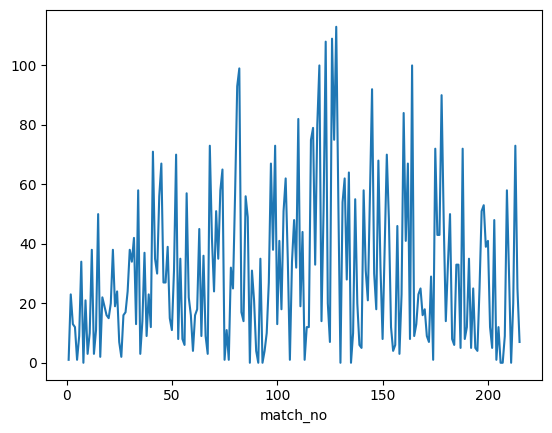

In [6]:
vk.plot()

<AxesSubplot: >

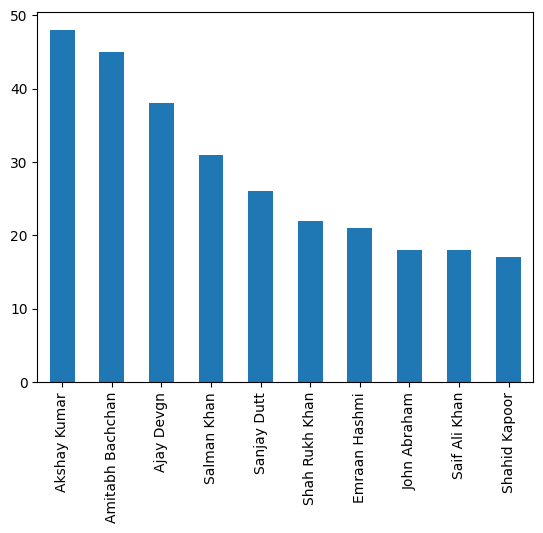

In [10]:
bollywood.value_counts().head(10).plot(kind = 'bar')